<a href="https://colab.research.google.com/github/kakn/groupc/blob/master/First_Year_Project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taking care of prerequisite

Installing and importing libraries

In [0]:
# Installing necessities

!pip install langid

# This should make sure v3.4 or higher of NLTK is installed
!pip install --user -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')

Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.4.5)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# Importing libraries

import csv
import re
import langid
import random
import random
import numpy as np
from langid.langid import LanguageIdentifier, model
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords 
from nltk import FreqDist
from nltk import ngrams
import matplotlib.pyplot as plt
import collections
import pandas as pd
import seaborn as sn
porter=PorterStemmer()

# Reading the original file into a sample file

We keep ~10% our original file and output it to a sample file

**Note: This code shouldn't be run here because the original file takes too long to process in Colab. Instead, run all the next codes using the sample.csv file**

In [0]:
"""
with open("sample.csv", "w") as out_file:
  with open("blogtext.csv", "r") as in_file:
  	#Reading the entire dataset in
  	l = in_file.readlines()
  	#Looping through an array of 68000 int, and using that to generate random indexes. 
  	for i in np.random.randint(0,len(l),68000): 
  		out_file.write(l[i])
"""

'\nwith open("sample.csv", "w") as out_file:\n  with open("blogtext.csv", "r") as in_file:\n  \t#Reading the entire dataset in\n  \tl = in_file.readlines()\n  \t#Looping through an array of 68000 int, and using that to generate random indexes. \n  \tfor i in np.random.randint(0,len(l),68000): \n  \t\tout_file.write(l[i])\n'

# Reading file

We read our sample file into a dictionary

In [0]:
# Read file function - reads our file into a dictionary with only the English texts

def read_file(file):
	# Creates a header (for keys) and a dictionary
	header = ["id", "gender", "age", "topic", "sign", "date", "text","age_group"]
	blogdict = {}
	for element in header:
		blogdict[element] = []

	# Creates an empty list to append each row in our data
	lines = []

	# Opens our data and appends each row to the empty list
	with open(file,'r') as f:
		for idx, row in enumerate(csv.reader((line.replace('\0','') for line in f), delimiter=",")):
	    # a row is a list containing all elements in a line

			# RegEx to remove every symbol that isn't a letter or number
			s = row[6]
			s = re.sub("[^\w\d'\s\\t]+", " ", s)
			row[6] = s

			#adds each row to the list
			lines.append(row)

	# Adds the data from each line to the dictionary with corresponding keys
	# Initiates a langid instance that normalizes the probabilities of language identification
	identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

	for line in lines[:10000]:
		if identifier.classify(line[6])[0] and identifier.classify(line[6])[1] > 0.5:
			blogdict["id"].append(line[0])
			blogdict["gender"].append(line[1])
			blogdict["age"].append(line[2])
			blogdict["topic"].append(line[3])
			blogdict["sign"].append(line[4])
			blogdict["date"].append(line[5])
			blogdict["text"].append(line[6])
				#compressing the ages into 3 age_groups. 
			if int(line[2]) > 27: 
				blogdict["age_group"].append("33-47")
			elif int(line[2]) > 22:
				blogdict["age_group"].append("23-27")
			elif int(line[2]) > 12:
				blogdict["age_group"].append("13-17")
	return blogdict

In [0]:
# Assigning our read data (dictionary) as a variable

blogdict = read_file("sample.csv")
print(blogdict["topic"][0:5])

['Arts', 'Technology', 'Student', 'Non-Profit', 'Student']


In [0]:
print(blogdict["text"][:3])

["           yes  yes  yes   everyone can edit their own posts   but let's not focus on that   let's focus on sweet  sweet peach pie          ", "       But not for a lack of trying   Charley was the first real hurricane that I've experienced  I have a little more respect for them than before   I live in Winter Springs  Central Florida  My apartment complex got hammered  The first entrance is still blocked by an oak tree and there are branches of every type and size littering the entire complex   The power went out Friday night at 9 30 pm but forunately was back on by Saturday night  in time for the Saturday Iron Chef showing   Fortunately  none of my friends or family are any worse for the wear  even though there are still power issues throughout Central Florida    My parents live in Longwood  a few miles from me  and I opted to spend the hurricane there  because  as you know  misery loves company  I wasn't very comfortable  so when the power came back on at 3 30 Saturday morning  I o

# Further cleaning

Stemming and removing stopwords from the text data in the dictionary.

In [0]:
# Stemming, removing stopwords

def stem_and_remove_stopwords_Sentence(sentence):
    #Tokenizes the input
    token_words=word_tokenize(sentence)
    token_words

    stop_words = set(stopwords.words('english'))

    added_stopwords=["'t","'s","'re", "n't", "'t", "'ve","'","'m","'","'no","'ll","'well","'d"] 
    for i in added_stopwords:
      stop_words.add(i)

    #Making a set of english stopwords from NLTK. Have added additional stopwords to
    #These being = 't, 's,'re, n't, 't, 've,"',",'m,','no,'ll,'well,'d
    stem_sentence=[]
    
    #Looping through the tokenized sentences and removing stopwords and stemming non stop words. 
    for word in token_words:
    	if not word in stop_words:
    		stem_sentence.append(porter.stem(word))
    return stem_sentence

In [0]:
# Iterates through stemming function for each line of text, so that each word in the line gets stemmed and stopwords are removed

for i in range(0,len(blogdict["id"])):
		blogdict["text"][i] = stem_and_remove_stopwords_Sentence(blogdict["text"][i])

In [0]:
for idx,i in enumerate(blogdict["text"]):
	if len(i) < 3:
		del blogdict["id"][idx]
		del blogdict["gender"][idx]
		del blogdict["age"][idx]
		del blogdict["topic"][idx]
		del blogdict["sign"][idx]
		del blogdict["date"][idx]
		del blogdict["text"][idx]

# Frequency Distribution

Creates a frequency distribution from a list, and returns:

*   The frequency distribution
*   The 3000 most common elements in the list



In [0]:
# Combines all lists of texts in our data into a single list 

flat_list = [item for sublist in blogdict["text"] for item in sublist]

In [0]:
# Frequency distribution function on all our texts (The function finds the frequency distribution of all used words)
# Also returns list of top 3000 most common words 

def freq_model(flat_list):
	# Finds frequency distribution on list
	FD=FreqDist(flat_list)
	
	# Creates a list of top 3000 common words in frequency distribution
	word_features = list(w[0] for w in FD.most_common(3000))
	
	return FD, word_features

In [0]:
# Runs frequency distribution function on all words (unigrams) and assigns variables (frequency distribution and 3000 most common words)

FD, word_features = freq_model(flat_list)

# Feature Extractor

The Feature Extractor takes in a list of elements (words, bigrams or similar), and checks whether or not each of the most common elements from the frequency distribution is in the list or not.

Returns a dictionary with the most common elements as keys and True or False as values.

In [0]:
# Feature Extractor
# Inputs text and returns a dictionary with the commons words as keys, 
# and the values True/False if the common word appears in the text

def find_features(document, word_features):
	if type(document[0]) == str:
		words = set(document)
	else:
		words = set([" ".join(tup) for tup in document])
	#if len(word_features[0]) > 1:
	if type(word_features[0]) == tuple:
		word_features = set([" ".join(tup) for tup in word_features])
	
	features = {}
	for w in word_features:
		features[w] = (w in words)
	
	return features


# Creating Sets

This function creates a training set, dev set and a test set by iterating over each feature and label pair (putting the feature into the Feature Extractor).

Returns lists of pairs where;


*   Index 0 is the output of the Feature Extractor on the feature
*   Index 1 is the label



In [0]:
# A function that creates featuresets, training set, dev set and test set
# By iterating and inputing each text into the Feature Extractor above

def creating_sets(feature, label, word_features):
    documents = list(zip(feature, label))
    random.shuffle(documents)
    # Creates a list with set pairs of (features, label) with each text and gender in the dict
    if label == blogdict["topic"]:
      feature_sets = [(find_features(n, word_features), "Student") if topic == "Student" else (find_features(n, word_features), "Not student") for (n,topic) in documents]

    else:
      feature_sets = [(find_features(n, word_features), lab) for (n,lab) in documents]

    # Creates a train set with 90% of the feature-label data, and a test set with 10% of the data
    train_set = feature_sets[:round(len(feature_sets)*0.9)]
    test_set = feature_sets[round(len(feature_sets)*0.9):]
    
    return train_set, test_set

# Creating Bigrams and Trigrams

Creates bigrams and trigrams for each of the texts and adds them to new keys in the dictionary of our data

In [0]:
# Creates bigrams and trigrams

blogdict["bigrams"] = []
blogdict["trigrams"] = []

for text in blogdict["text"]:
  current_bi = []
  current_tri = []

  bigrams = ngrams(text, 2)

  for gram in bigrams:
    current_bi.append(gram)

  trigrams = ngrams(text, 3)

  for gram in trigrams:
    current_tri.append(gram)

  blogdict["bigrams"].append(current_bi)
  blogdict["trigrams"].append(current_tri)

In [0]:
# Sanity check

print(blogdict["text"][0])
print(blogdict["bigrams"][0])
print(blogdict["trigrams"][0])

['ye', 'ye', 'ye', 'everyon', 'edit', 'post', 'let', 'focu', 'let', 'focu', 'sweet', 'sweet', 'peach', 'pie']
[('ye', 'ye'), ('ye', 'ye'), ('ye', 'everyon'), ('everyon', 'edit'), ('edit', 'post'), ('post', 'let'), ('let', 'focu'), ('focu', 'let'), ('let', 'focu'), ('focu', 'sweet'), ('sweet', 'sweet'), ('sweet', 'peach'), ('peach', 'pie')]
[('ye', 'ye', 'ye'), ('ye', 'ye', 'everyon'), ('ye', 'everyon', 'edit'), ('everyon', 'edit', 'post'), ('edit', 'post', 'let'), ('post', 'let', 'focu'), ('let', 'focu', 'let'), ('focu', 'let', 'focu'), ('let', 'focu', 'sweet'), ('focu', 'sweet', 'sweet'), ('sweet', 'sweet', 'peach'), ('sweet', 'peach', 'pie')]


Creates bigrams and trigrams for the whole list combined

In [0]:
# Creating bigrams and trigrams for the whole list of all texts combined
# This is used for frequency distribution

bigrams = ngrams(flat_list, 2)
trigrams = ngrams(flat_list, 3)

# Sanity check

for idx,gram in enumerate(bigrams):
  print(gram)
  if idx == 10:
    break

for idx,gram in enumerate(trigrams):
  print(gram)
  if idx == 10:
    break

('ye', 'ye')
('ye', 'ye')
('ye', 'everyon')
('everyon', 'edit')
('edit', 'post')
('post', 'let')
('let', 'focu')
('focu', 'let')
('let', 'focu')
('focu', 'sweet')
('sweet', 'sweet')
('ye', 'ye', 'ye')
('ye', 'ye', 'everyon')
('ye', 'everyon', 'edit')
('everyon', 'edit', 'post')
('edit', 'post', 'let')
('post', 'let', 'focu')
('let', 'focu', 'let')
('focu', 'let', 'focu')
('let', 'focu', 'sweet')
('focu', 'sweet', 'sweet')
('sweet', 'sweet', 'peach')


Creates a Frequency Distribution and the top 3000 most common elements for the bigrams and trigrams

In [0]:
# Frequency distribution and word features for bigrams and trigrams:

FD_bigrams, word_features_bi = freq_model(bigrams)

FD_trigrams, word_features_tri = freq_model(trigrams)

# Predicting Gender

### Unigrams

In [0]:
# Creates the set (using creating_sets function)
train_set, test_set = creating_sets(blogdict["text"], blogdict["gender"], word_features)

In [0]:
# Bayes Classifier as a variable on training set

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.5870236869207003


In [0]:
# Displays 5 most informative features

classifier.show_most_informative_features(15)

Most Informative Features
                   peach = True           female : male   =     10.0 : 1.0
                   gmail = True             male : female =      8.5 : 1.0
                   kitti = True           female : male   =      7.2 : 1.0
                     lyk = True           female : male   =      7.2 : 1.0
               microsoft = True             male : female =      6.8 : 1.0
                    knit = True           female : male   =      6.4 : 1.0
                      PC = True             male : female =      5.7 : 1.0
                   islam = True             male : female =      5.1 : 1.0
                 laundri = True           female : male   =      5.0 : 1.0
                    sara = True           female : male   =      4.9 : 1.0
                  michel = True           female : male   =      4.7 : 1.0
                 vietnam = True             male : female =      4.6 : 1.0
                      um = True           female : male   =      4.5 : 1.0

#### Confusion Matrix

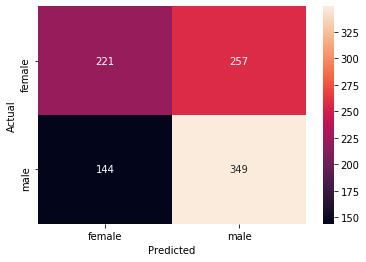

In [0]:
# Confusion Matrix

predicted = classifier.classify_many(i[0] for i in test_set)

data = {'y_Actual':    [i[1] for i in test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

### Bigrams and trigrams

In [0]:
# Creates the set (using creating_sets function)
bi_train_set, bi_test_set = creating_sets(blogdict["bigrams"], blogdict["gender"], word_features_bi)
tri_train_set, tri_test_set = creating_sets(blogdict["trigrams"], blogdict["gender"], word_features_tri)

In [0]:
# Bayes Classifier as a variable on training set

bi_classifier = nltk.NaiveBayesClassifier.train(bi_train_set)
tri_classifier = nltk.NaiveBayesClassifier.train(tri_train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

bi_accuracy = nltk.classify.accuracy(bi_classifier, bi_test_set)
print(bi_accuracy)

tri_accuracy = nltk.classify.accuracy(tri_classifier, tri_test_set)
print(tri_accuracy)

0.5664263645726055
0.5674562306900103


In [0]:
# Displays most informative features

bi_classifier.show_most_informative_features(15)

Most Informative Features
              thing ever = True           female : male   =     14.7 : 1.0
             these peopl = True             male : female =     11.4 : 1.0
                know els = True           female : male   =      8.4 : 1.0
                It might = True           female : male   =      8.4 : 1.0
               depress I = True           female : male   =      7.6 : 1.0
                life and = True           female : male   =      7.2 : 1.0
              whole life = True           female : male   =      6.6 : 1.0
               game play = True             male : female =      6.1 : 1.0
              find anyth = True           female : male   =      6.0 : 1.0
            link urllink = True             male : female =      6.0 : 1.0
                did know = True           female : male   =      5.9 : 1.0
            think pretti = True           female : male   =      5.9 : 1.0
              want anyth = True           female : male   =      5.9 : 1.0

In [0]:
# Displays most informative features

tri_classifier.show_most_informative_features(15)

Most Informative Features
           I could write = True           female : male   =      7.9 : 1.0
           I guess could = True           female : male   =      7.2 : 1.0
               I drunk I = True           female : male   =      6.5 : 1.0
               but I get = True           female : male   =      6.5 : 1.0
             I want live = True           female : male   =      6.5 : 1.0
            I sound like = True           female : male   =      6.5 : 1.0
             I get earli = True           female : male   =      6.5 : 1.0
             next year I = True           female : male   =      5.8 : 1.0
              I love way = True           female : male   =      5.8 : 1.0
     graduat high school = True           female : male   =      5.8 : 1.0
              I love guy = True           female : male   =      5.8 : 1.0
             nbsp I feel = True           female : male   =      5.8 : 1.0
             well I love = True           female : male   =      5.8 : 1.0

#### Confusion Matrix

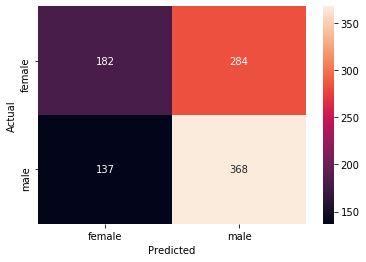

In [0]:
# Confusion Matrix - Bigrams

predicted = bi_classifier.classify_many(i[0] for i in bi_test_set)

data = {'y_Actual':    [i[1] for i in bi_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

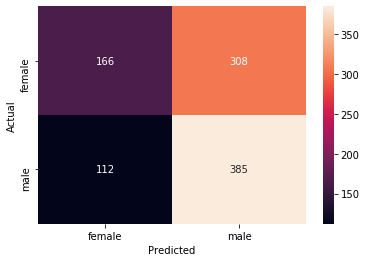

In [0]:
# Confusion Matrix - Trigrams

predicted = tri_classifier.classify_many(i[0] for i in tri_test_set)

data = {'y_Actual':    [i[1] for i in tri_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

# Predicting Topics (Student or not)

### Unigrams

In [0]:
# Creates the set (using creating_sets function)
train_set, test_set = creating_sets(blogdict["text"], blogdict["topic"], word_features)

In [0]:
# Bayes Classifier as a variable on training set

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.7312049433573635


In [0]:
# Displays 5 most informative features

classifier.show_most_informative_features(15)

Most Informative Features
                    tyke = True           Studen : Not st =     12.3 : 1.0
                      tt = True           Studen : Not st =      8.3 : 1.0
                  employ = True           Not st : Studen =      6.6 : 1.0
                   retir = True           Not st : Studen =      6.3 : 1.0
                    haiz = True           Studen : Not st =      5.8 : 1.0
                     não = True           Studen : Not st =      5.6 : 1.0
                       é = True           Studen : Not st =      5.6 : 1.0
                 suspect = True           Not st : Studen =      5.3 : 1.0
                   labor = True           Not st : Studen =      5.3 : 1.0
                   agenc = True           Not st : Studen =      5.3 : 1.0
                    rite = True           Studen : Not st =      5.2 : 1.0
                     lor = True           Studen : Not st =      5.1 : 1.0
                     oso = True           Studen : Not st =      5.1 : 1.0

#### Confusion Matrix

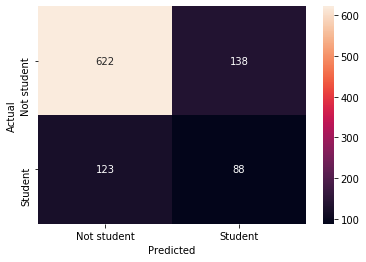

In [0]:
# Confusion Matrix

predicted = classifier.classify_many(i[0] for i in test_set)

data = {'y_Actual':    [i[1] for i in test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

### Bigrams and trigrams

In [0]:
# Creates the set (using creating_sets function)
bi_train_set, bi_test_set = creating_sets(blogdict["bigrams"], blogdict["topic"], word_features_bi)
tri_train_set, tri_test_set = creating_sets(blogdict["trigrams"], blogdict["topic"], word_features_tri)

In [0]:
# Bayes Classifier as a variable on training set

bi_classifier = nltk.NaiveBayesClassifier.train(bi_train_set)
tri_classifier = nltk.NaiveBayesClassifier.train(tri_train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

bi_accuracy = nltk.classify.accuracy(bi_classifier, bi_test_set)
print(bi_accuracy)

tri_accuracy = nltk.classify.accuracy(tri_classifier, tri_test_set)
print(tri_accuracy)

0.7023686920700309
0.741503604531411


In [0]:
# Displays most informative features

bi_classifier.show_most_informative_features(15)

Most Informative Features
                15 minut = True           Not st : Studen =      8.0 : 1.0
                     5 4 = True           Studen : Not st =      7.5 : 1.0
            read urllink = True           Not st : Studen =      7.2 : 1.0
               need babi = True           Studen : Not st =      6.1 : 1.0
              post later = True           Studen : Not st =      6.1 : 1.0
                 It must = True           Studen : Not st =      5.2 : 1.0
                 u think = True           Studen : Not st =      5.2 : 1.0
                  I send = True           Not st : Studen =      5.0 : 1.0
                 go movi = True           Studen : Not st =      5.0 : 1.0
                lol well = True           Studen : Not st =      4.9 : 1.0
            almost everi = True           Not st : Studen =      4.8 : 1.0
                 He told = True           Not st : Studen =      4.8 : 1.0
               dont like = True           Studen : Not st =      4.7 : 1.0

In [0]:
# Displays most informative features

tri_classifier.show_most_informative_features(15)

Most Informative Features
            I realli wan = True           Studen : Not st =     12.4 : 1.0
        feel realli good = True           Studen : Not st =     12.4 : 1.0
           excit I think = True           Studen : Not st =     12.4 : 1.0
          school today I = True           Studen : Not st =     12.4 : 1.0
                  4 30 I = True           Studen : Not st =     10.2 : 1.0
            clean room I = True           Studen : Not st =     10.2 : 1.0
             lol oh well = True           Studen : Not st =     10.2 : 1.0
              I took nap = True           Studen : Not st =     10.2 : 1.0
            everi one us = True           Studen : Not st =     10.2 : 1.0
             wan na tell = True           Studen : Not st =     10.2 : 1.0
              but time I = True           Studen : Not st =     10.2 : 1.0
             day I found = True           Studen : Not st =     10.2 : 1.0
          like I thought = True           Studen : Not st =     10.2 : 1.0

#### Confusion Matrix

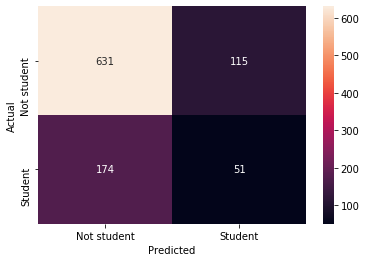

In [0]:
# Confusion Matrix - Bigrams

predicted = bi_classifier.classify_many(i[0] for i in bi_test_set)

data = {'y_Actual':    [i[1] for i in bi_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

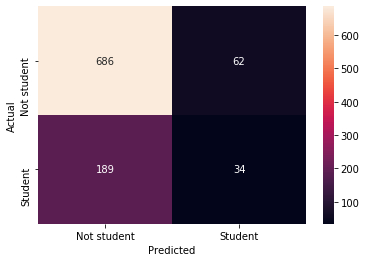

In [0]:
# Confusion Matrix - Trigrams

predicted = tri_classifier.classify_many(i[0] for i in tri_test_set)

data = {'y_Actual':    [i[1] for i in tri_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

# Predicting Age

### Unigrams

In [0]:
# Creates the set (using creating_sets function)
train_set, test_set = creating_sets(blogdict["text"], blogdict["age_group"], word_features)

In [0]:
# Bayes Classifier as a variable on training set

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.41709577754891863


In [0]:
# Displays 5 most informative features

classifier.show_most_informative_features(15)

Most Informative Features
                reaction = True            23-27 : 33-47  =      8.4 : 1.0
                   chili = True            23-27 : 13-17  =      6.3 : 1.0
                 balloon = True            23-27 : 33-47  =      5.0 : 1.0
                principl = True            33-47 : 23-27  =      4.7 : 1.0
                    darl = True            33-47 : 13-17  =      4.7 : 1.0
                 chamber = True            13-17 : 33-47  =      4.6 : 1.0
                      er = True            13-17 : 33-47  =      4.6 : 1.0
                   plate = True            13-17 : 33-47  =      4.5 : 1.0
                  jacket = True            13-17 : 33-47  =      4.1 : 1.0
                   recip = True            23-27 : 33-47  =      3.8 : 1.0
                 conserv = True            33-47 : 13-17  =      3.7 : 1.0
                    plot = True            33-47 : 23-27  =      3.7 : 1.0
                   europ = True            13-17 : 23-27  =      3.7 : 1.0

#### Confusion Matrix

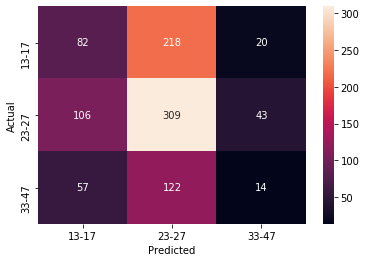

In [0]:
# Confusion Matrix

predicted = classifier.classify_many(i[0] for i in test_set)

data = {'y_Actual':    [i[1] for i in test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

### Bigrams and trigrams

In [0]:
# Creates the set (using creating_sets function)
bi_train_set, bi_test_set = creating_sets(blogdict["bigrams"], blogdict["age_group"], word_features_bi)
tri_train_set, tri_test_set = creating_sets(blogdict["trigrams"], blogdict["age_group"], word_features_tri)

In [0]:
# Bayes Classifier as a variable on training set

bi_classifier = nltk.NaiveBayesClassifier.train(bi_train_set)
tri_classifier = nltk.NaiveBayesClassifier.train(tri_train_set)

In [0]:
# Tests, assigns and prints accuracy of our model

bi_accuracy = nltk.classify.accuracy(bi_classifier, bi_test_set)
print(bi_accuracy)

tri_accuracy = nltk.classify.accuracy(tri_classifier, tri_test_set)
print(tri_accuracy)

0.4016477857878476
0.43975283213182287


In [0]:
# Displays most informative features

bi_classifier.show_most_informative_features(15)

Most Informative Features
                  I pick = True            13-17 : 33-47  =      8.7 : 1.0
               I graduat = True            13-17 : 23-27  =      8.0 : 1.0
                den went = True            33-47 : 23-27  =      7.5 : 1.0
             sunday morn = True            33-47 : 13-17  =      6.9 : 1.0
             know better = True            33-47 : 13-17  =      6.9 : 1.0
               well last = True            13-17 : 33-47  =      6.8 : 1.0
              help think = True            33-47 : 13-17  =      6.6 : 1.0
            realli anyth = True            33-47 : 13-17  =      6.5 : 1.0
             peopl could = True            33-47 : 13-17  =      6.1 : 1.0
          you understand = True            33-47 : 23-27  =      5.8 : 1.0
               long sinc = True            33-47 : 23-27  =      5.8 : 1.0
             senior year = True            33-47 : 23-27  =      5.8 : 1.0
                   I bit = True            23-27 : 33-47  =      5.8 : 1.0

In [0]:
# Displays most informative features

tri_classifier.show_most_informative_features(15)

Most Informative Features
             I play game = True            33-47 : 23-27  =     12.3 : 1.0
            life I think = True            33-47 : 23-27  =      9.0 : 1.0
             It much fun = True            33-47 : 23-27  =      9.0 : 1.0
             I need talk = True            33-47 : 23-27  =      9.0 : 1.0
           would go back = True            33-47 : 23-27  =      9.0 : 1.0
              I get tire = True            33-47 : 23-27  =      7.4 : 1.0
               how I get = True            33-47 : 23-27  =      7.4 : 1.0
            I think help = True            33-47 : 23-27  =      7.4 : 1.0
           I know realli = True            33-47 : 23-27  =      7.4 : 1.0
                 I day I = True            33-47 : 23-27  =      7.4 : 1.0
          someth I think = True            33-47 : 23-27  =      7.4 : 1.0
         first I thought = True            33-47 : 23-27  =      7.4 : 1.0
              go tri get = True            33-47 : 23-27  =      7.4 : 1.0

#### Confusion Matrix

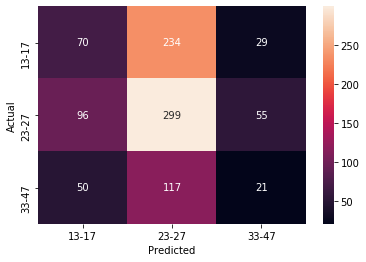

In [0]:
# Confusion Matrix - Bigrams

predicted = bi_classifier.classify_many(i[0] for i in bi_test_set)

data = {'y_Actual':    [i[1] for i in bi_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

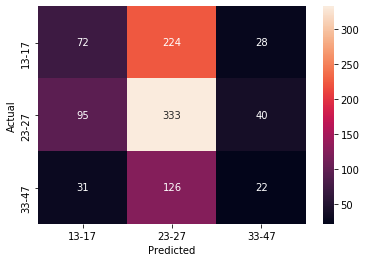

In [0]:
# Confusion Matrix - Trigrams

predicted = tri_classifier.classify_many(i[0] for i in tri_test_set)

data = {'y_Actual':    [i[1] for i in tri_test_set],
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='g')

# Visualizing data

Visualizing gender data

Text(0.5, 0.98, 'Gender ratio')

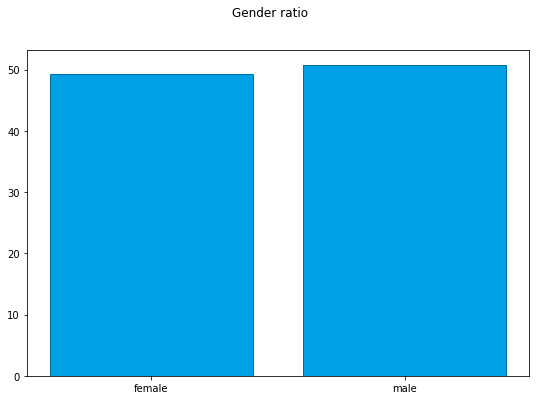

In [0]:
data = collections.Counter(blogdict["gender"])

# Normalizing:

total = 0
for key in data:
  total += data[key]
for key in data:
  data[key] = data[key]/total*100

# Plotting

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(9, 6), sharey=True)
axs.bar(names, values, color="#00a0e5", edgecolor="#006d9c")
fig.suptitle('Gender ratio')

In [0]:
print("Female / Male ratio in numbers:", data)

Female / Male ratio in numbers: Counter({'male': 50.74626865671642, 'female': 49.25373134328358})


Visualizing topic data

Text(0.5, 0.98, 'Student / Not Student ratio')

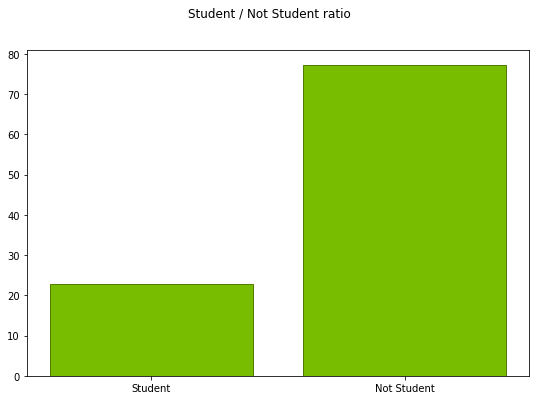

In [0]:
data = collections.Counter(blogdict["topic"])

# Deleting topics with below X appearences:

data["Not Student"] = 0
delete_these = []
for key in data:
  if key != "Student":
    if key != "Not Student":
     data["Not Student"] += int(data[key])
     delete_these.append(key)

for i in delete_these:
  del data[i]

# Normalizing:

total = 0
for key in data:
  total += data[key]
for key in data:
  data[key] = data[key]/total*100

# Plotting

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(9, 6), sharey=True)
axs.bar(names, values, color="#78bd00", edgecolor="#507d01")
fig.suptitle('Student / Not Student ratio')

Text(0.5, 0.98, 'Gender ratio')

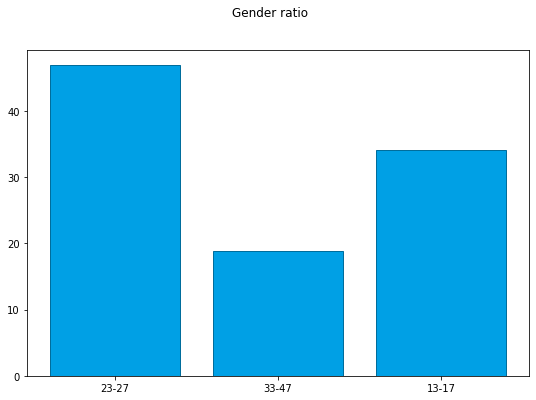

In [0]:
data = collections.Counter(blogdict["age_group"])

# Normalizing:

total = 0
for key in data:
  total += data[key]
for key in data:
  data[key] = data[key]/total*100

# Plotting

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(9, 6), sharey=True)
axs.bar(names, values, color="#00a0e5", edgecolor="#006d9c")
fig.suptitle('Gender ratio')